## Problem Statement

We'll use a dataset of AirBnB rental rates to identify similar rates in one area for competing AirBnB units and make predictions for ideal rates to maximize profit. 

## Exploring AirBnB dataset

While AirBnB doesn't release any data on the listings in their marketplace, a separate group named [Inside AirBnB](http://insideairbnb.com/get-the-data.html) has extracted data on a sample of the listings for many of the major cities on the website.

In [1]:
import pandas as pd

# read csv
dc_listings = pd.read_csv("/Users/brindhamanivannan/Datasets/dc_airbnb.csv")
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC
2,90%,100%,2,1,Private room,1.0,2.0,1.0,$50.00,NaN,NaN,2,1125,1,38.955291,-76.986006,Hyattsville,20782,MD
3,100%,NaN,1,2,Private room,1.0,1.0,1.0,$95.00,NaN,NaN,1,1125,0,38.872134,-77.019639,Washington,20024,DC
4,92%,67%,1,4,Entire home/apt,1.0,1.0,1.0,$50.00,$15.00,$450.00,7,1125,0,38.996382,-77.041541,Silver Spring,20910,MD


In [2]:
# display the first row in dc_listings

print(dc_listings.iloc[0]) # ioc to to return a row at a specific integer location



host_response_rate                  92%
host_acceptance_rate                91%
host_listings_count                  26
accommodates                          4
room_type               Entire home/apt
bedrooms                              1
bathrooms                             1
beds                                  2
price                           $160.00
cleaning_fee                    $115.00
security_deposit                $100.00
minimum_nights                        1
maximum_nights                     1125
number_of_reviews                     0
latitude                          38.89
longitude                      -77.0028
city                         Washington
zipcode                           20003
state                                DC
Name: 0, dtype: object


## Strategy

- Find a few similar listings
- Calculate the average nightly rental price of these listings
- Set the average price as the price for our listing

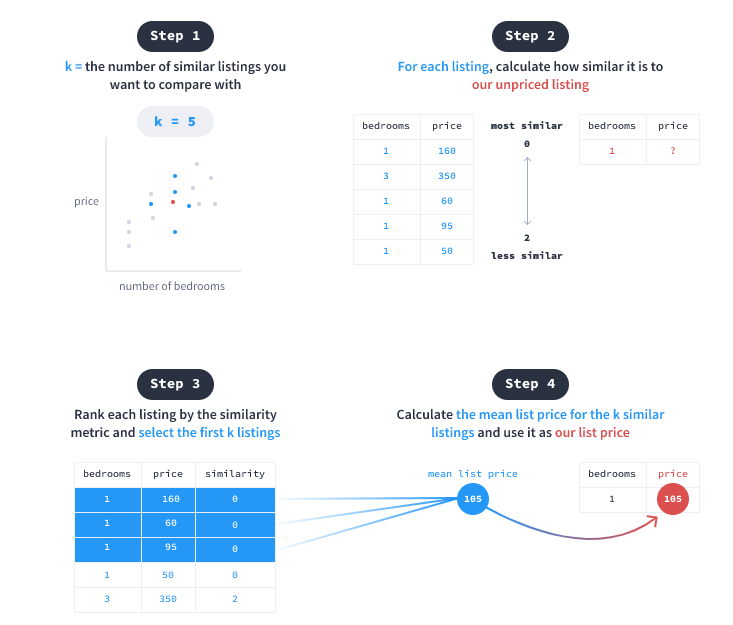

Let us define

1. The similarity metric
2. K value

And then we'll implement the k-nearest neighbors algorithm and use it to suggest a price for a new, unpriced listing. 

## Euclidean distance

How does a similariy metric work? By comparing a fixed set of numerical features(aka attributes) between two observations. In our case, living spaces.

What are we trying to predit? Price. A continuous value. In this case, the main similarity metric is Euclidean distance.

So what is an Euclidean distance? Here's the general formula for Euclidean distance:

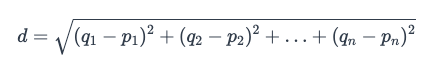

where q1 to qn represents feature values for one observation and p1 to pn represents feature values for the other onservation.

Here's a diagram that breaks down the Euclidean distance between the first two observations in the dataset using only the host_listings_count, accommodates, bedrooms, bathrooms, and beds columns

In [3]:
dc_listings.head(2)

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state
0,92%,91%,26,4,Entire home/apt,1.0,1.0,2.0,$160.00,$115.00,$100.00,1,1125,0,38.890046,-77.002808,Washington,20003,DC
1,90%,100%,1,6,Entire home/apt,3.0,3.0,3.0,$350.00,$100.00,NaN,2,30,65,38.880413,-76.990485,Washington,20003,DC


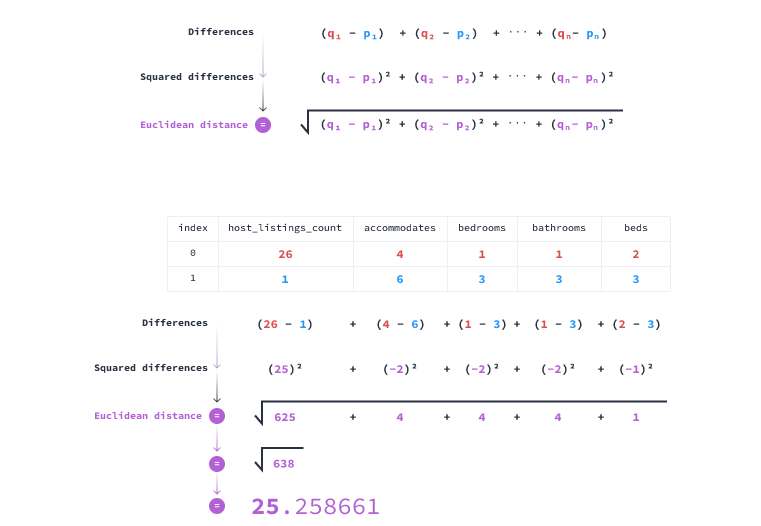

We will use only one feature for now. So this is the univariate case. The formula for the univariate case is d = √(q1−p1)2 

In [9]:
# Calculate the Euclidean distance between our living space, which can accommodate three people, and the first living space in the dc_listings 

# our living space
our_acc_value = 3

# the first living space in the dc_listings
first_living_space_value = dc_listings.iloc[0]['accommodates']
print(first_living_space_value)

4


In [10]:
import numpy as np

# Euclidean distance 
first_distance = np.abs(first_living_space_value - our_acc_value)
print(first_distance)

1


The Euclidean distance between the first row in the dc_listings DataFrame and our own living space is 1

How do we know if this distance is high or low? If we look at the Euclidean distance equation itself, the lowest value we can achieve is 0. This happens when the feature value is exactly the same for both observations we are comparing.

So, the closer to 0 the distance is, the more similar the living spaces are.

## Calculate distance for all observations

In [11]:
dc_listings.shape

(3723, 19)

In [12]:
import numpy as np

distances = [] # distances list
def calculate_distance(col):
    """
    Function to calculate euclidean distance
    """
    our_acc_value = 3
    for value in col:
        distance = np.abs(value - our_acc_value)
        distances.append(distance)
    return distances
    
res = calculate_distance(dc_listings['accommodates']) # calculate the distance between each value in the accommodates column
# print(res)
print(len(res))
print(dc_listings.columns)


"""
Alternate Method using lambda function and apply method

new_listing = 3
dc_listings['distance'] = dc_listings['accommodates'].apply(
    lambda x: np.abs(x - new_listing)
)
print(dc_listings['distance'].value_counts())



"""

3723
Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'accommodates', 'room_type', 'bedrooms', 'bathrooms', 'beds', 'price',
       'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'latitude', 'longitude', 'city', 'zipcode',
       'state'],
      dtype='object')


In [13]:
type(distances)

list

In [14]:
dc_listings['distance'] = pd.Series(distances) # add a new column 'distance' to dc_listings from the distances list
print(dc_listings.columns) # added new column shows


Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'accommodates', 'room_type', 'bedrooms', 'bathrooms', 'beds', 'price',
       'cleaning_fee', 'security_deposit', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'latitude', 'longitude', 'city', 'zipcode',
       'state', 'distance'],
      dtype='object')


In [15]:
print(dc_listings['distance'].value_counts()) # unique value counts for the distance column

1     2294
2      503
0      461
3      279
5       73
4       35
7       22
6       17
9       12
13       8
8        7
12       6
11       4
10       2
Name: distance, dtype: int64


## The proxy for similarity (distance values) - Randomize and Sort

Now, we can rank the existing living spaces by ascending distance values, the proxy for similarity.

There are 461 living spaces with distance 0. This 461 living spaces can accomodate 3 three just like ours. After sorting, the first 5 (we decided, k=5) neighbors will have a distance value of 0, the neighbors list of our interest. 
But, here is a catch!

If we sort by the distance column and then select the first 5 living spaces, we would be BIASING the result to the ordering of the dataset.

In [16]:
print(dc_listings[dc_listings["distance"] == 0]["accommodates"])

26      3
34      3
36      3
40      3
44      3
       ..
3675    3
3697    3
3707    3
3714    3
3722    3
Name: accommodates, Length: 461, dtype: int64


So, to avoid BIAS, we will randomize the ordering of the dataset first. And then sort.

This way, all of the living spaces that accommodate the same number of people will still be at the top of the DataFrame, but they will be in random order across the first 461 rows.

In [17]:
# Randomize

import numpy as np

# np.random.permutation() function to return a NumPy array of shuffled index values
# DataFrame method loc[] to return a new DataFrame containing the shuffled order

dc_listings = dc_listings.loc[np.random.permutation(len(dc_listings))]
dc_listings.head()



,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
3535,71%,0%,1,1,Private room,1.0,1.0,1.0,$165.00,NaN,NaN,1,1125,0,38.889026,-77.000161,Washington,20003,DC,2
1642,100%,100%,1,2,Entire home/apt,1.0,1.0,1.0,$125.00,$25.00,$100.00,2,365,5,38.936930,-77.024040,Washington,20011,DC,1
436,NaN,NaN,1,2,Private room,1.0,1.0,1.0,$100.00,NaN,NaN,2,1125,0,38.908886,-77.023127,Washington,20001,DC,1
2042,90%,75%,2,2,Private room,1.0,2.0,1.0,$90.00,$75.00,NaN,1,1125,10,38.894744,-76.992452,Washington,20002,DC,1
1219,97%,63%,7,2,Entire home/apt,0.0,1.0,1.0,$109.00,$65.00,$300.00,6,1125,1,38.903408,-77.049029,Washington,20037,DC,1


In [18]:
dc_listings.shape

(3723, 20)

In [19]:
# Sort
dc_listings = dc_listings.sort_values('distance')
dc_listings.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,room_type,bedrooms,bathrooms,beds,price,cleaning_fee,security_deposit,minimum_nights,maximum_nights,number_of_reviews,latitude,longitude,city,zipcode,state,distance
3328,100%,86%,1,3,Private room,1.0,1.0,1.0,$57.00,$20.00,NaN,1,5,1,38.922693,-77.077188,Washington,20007,DC,0
2311,NaN,NaN,1,3,Entire home/apt,1.0,1.0,1.0,$117.00,$50.00,$220.00,1,1125,3,38.925462,-77.040900,Washington,20009,DC,0
2559,100%,100%,1,3,Entire home/apt,1.0,1.0,1.0,$122.00,NaN,NaN,2,365,69,38.913237,-77.008997,Washington,20002,DC,0
3478,100%,100%,1,3,Private room,1.0,1.0,1.0,$94.00,$10.00,NaN,1,12,50,38.879295,-76.983214,Washington,20003,DC,0
1607,NaN,NaN,1,3,Entire home/apt,1.0,1.0,1.0,$275.00,$25.00,NaN,1,15,9,38.939912,-77.027160,Washington,20011,DC,0


In [20]:
# Display the first 10 values in the price column
print(dc_listings.iloc[0:10]['price'])

3328     $57.00
2311    $117.00
2559    $122.00
3478     $94.00
1607    $275.00
200     $145.00
1486    $110.00
3578    $195.00
2801    $110.00
2729    $200.00
Name: price, dtype: object


## Average Price

## Cleaning Price Column

The price column contains characters line , and $. We need to clean them first.
Second, we need to convert the Price column from text to numeric.

Lets us do it!

In [21]:
stripped_commas = dc_listings['price'].str.replace(',', '')
stripped_dollars = stripped_commas.str.replace('$', '')
dc_listings['price'] = stripped_dollars.astype('float')
dc_listings['price']

3328      57.0
2311     117.0
2559     122.0
3478      94.0
1607     275.0
         ...  
2560      60.0
1594    1250.0
1596     299.0
611     1250.0
1402    1200.0
Name: price, Length: 3723, dtype: float64

In [22]:
# Calculate mean price

mean_price = dc_listings.iloc[0:5]['price'].mean()
print(mean_price)

133.0


Congratulations!!! We have just made our first prediction.

## Conclusion

Based on the average price of other listings that accommodate three people, we should charge 133 dollars per night for a guest to stay at our living space.

## Function to Make Predictions
#### We're essentially turning the code we wrote above into a reusable function

Write a function named predict_price that can use the k-nearest neighbors machine learning technique to calculate the suggested price for any value for accommodates. 

This function should do the following:

- Take in a single parameter, new_listing, that describes the number of bedrooms.


- (We've added code that assigns dc_listings to a new DataFrame named temp_df. We used the pandas.DataFrame.copy() method, so the underlying DataFrame is assigned to temp_df, instead of just a reference to dc_listings)


- Calculate the distance between each value in the accommodates column and the new_listing value that was passed in.


- Assign the resulting Series object to the distance column in temp_df.


- Sort temp_df by the distance column and select the first five values in the price column. Don't randomize the ordering of temp_df.


- Calculate the mean of these five values and use that as the return value for the entire predict_price function.


- Use the predict_price function to suggest a price for a living space that does the following:


1. If it accommodates 1 person, assign the suggested price to acc_one.

2. If it accommodates 2 people, assign the suggested price to acc_two.

3. If it accommodates 4 people, assign the suggested price to acc_four.


In [23]:
def predict_price(new_listing):
    """
    function that can use the k-nearest neighbors machine learning technique to calculate the suggested price for any value for accommodates
    """
    temp_df = dc_listings.copy()
    
    ## Complete the function
    temp_df['distance'] = temp_df['accommodates'].apply(lambda x: np.abs(x - new_listing))
    temp_df = temp_df.sort_values('distance')
    nearest_neighbors = temp_df.iloc[0:5]['price']
    predicted_price = nearest_neighbors.mean()
    return(predicted_price)

acc_one = predict_price(1)
acc_two = predict_price(2)
acc_four = predict_price(4)

In [24]:
print(acc_one)
print(acc_two)
print(acc_four)

56.6
120.8
131.0


## Takeaways

In [ ]:
Thus far, we explored the problem of predicting the optimal listing price for an AirBnB rental based on the price of similar listings on the site. 

We worked through the entire machine learning workflow, from selecting a feature to testing the model. 

To explore the basics of machine learning, we limited ourselves to only using one feature (the univariate case) and a fixed k value of 5.